In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Subway/Churn_Modelling.csv')

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.shape

(10000, 14)

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


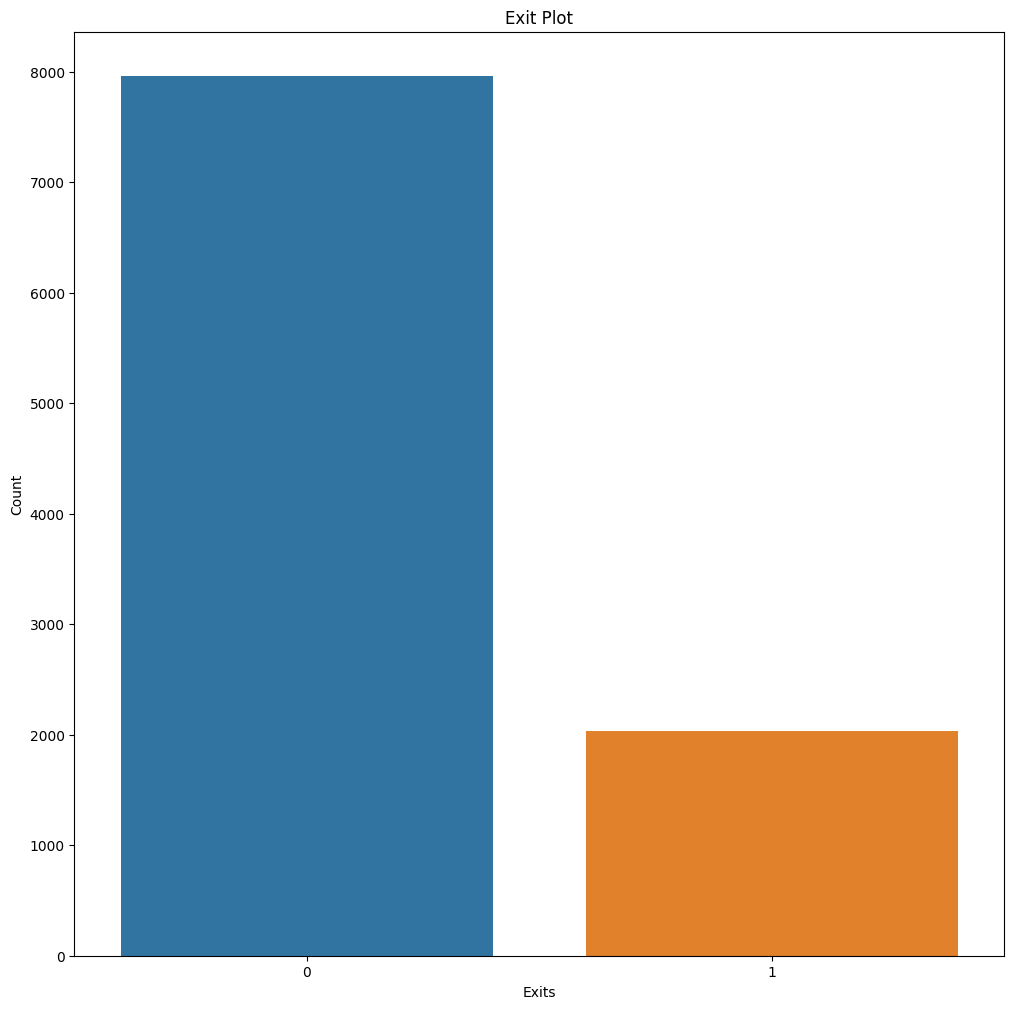

In [6]:
plt.figure(figsize=(12,12))
sns.countplot(x='Exited', data=df)
plt.xlabel('Exits')
plt.ylabel('Count')
plt.title('Exit Plot')
plt.show()

In [7]:
exits = list(df['Exited'].unique())
exits.sort()
exits

[0, 1]

In [8]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
df.drop('RowNumber', axis=1, inplace=True)
df.drop('CustomerId', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)

In [10]:

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics

data = df
le = OrdinalEncoder()
data[['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']] = le.fit_transform(
    data[[ 'CreditScore','Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']])

Features = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
X = data[Features]
Y = data['Exited']

clf_nb = CategoricalNB()
clf_nb.fit(X,Y)


CategoricalNB()

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)  # You can adjust n_estimators as needed
clf_rf.fit(X, Y)



RandomForestClassifier(random_state=0)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier


clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)  # You can adjust n_estimators as needed
clf_gb.fit(X, Y)


GradientBoostingClassifier(random_state=0)

In [17]:
y_pred = clf_nb.predict(X)
print(Y)
print(y_pred)

print("Accuracy : " , metrics.accuracy_score(y_pred,Y) * 100)

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float64
[0. 0. 1. ... 0. 1. 0.]
Accuracy :  94.22


In [18]:
y_pred = clf_rf.predict(X)
print(Y)
print(y_pred)

print("Accuracy : " , metrics.accuracy_score(y_pred,Y) * 100)

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float64
[1. 0. 1. ... 1. 1. 0.]
Accuracy :  100.0


In [19]:
y_pred = clf_gb.predict(X)
print(Y)
print(y_pred)

print("Accuracy : " , metrics.accuracy_score(y_pred,Y) * 100)

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float64
[0. 0. 1. ... 0. 0. 0.]
Accuracy :  87.15
